# STA 208: Homework 4 (Do not distribute)

__Instructions:__ Submit it on canvas.  The canvas should include all of your code either in this notebook file, or a separate python file that is imported and ran in this notebook.  We should be able to open this notebook and run everything here by running the cells in sequence.  The written portions can be either done in markdown and TeX in new cells or written clearly by hand when you hand it in.

- Code should be well organized and documented
- All math should be clear and make sense sequentially
- When in doubt explain what is going on
- You will be graded on correctness of your math, code efficiency and succinctness, and conclusions and modelling decisions

__Exercise 1__ (30 pts)

Recall that a Mercer kernel is a similarity function $k(x,x')$ such that the matrix $K_{ij} = ( k(x_i,x_j) )_{ij}$ is positive semidefinite regardless of dataset $\{x_i\}_{i=1}^n \subset \mathbb R^p$.


1. (6 pts) Suppose that the spectral decomposition of $K$ is $K = U \Lambda U^\top$ where $U$ is $n \times n$ and $\Lambda$ is diagonal.  What do we know about $\Lambda$ and why?

1. (9 pts) Consider ridge regression with objective,
$$
\min_{\beta \in \ell_2} \frac 12 \sum_{i=1}^n ( y_i - \Phi(x_i)^\top \beta )^2 + \lambda \| \beta\|_2^2.
$$
rewrite the above as an optimization over $\alpha \in \mathbb R^n$ using the kernel trick (this gives you kernel ridge regression).

1. (6 pts) Suppose that the kernel matrix has spectral decomposition $K = U \Lambda U^\top$.  Write the solution to the kernel ridge regression as a function of $\Lambda, U, y$.  What does this tell you about the effect of the eigenvalues on the solution (suppose that you only increase one of the eigenvalues).

1. (9 pts) Check if the following notions of similarity are Mercer kernels,
 1. $k(x,x') = x^\top x'$
 1. $k(x,x') = x_1 x'_1 - x_2 x_2', \quad x, x' \in \mathbb R^2$ 
 1. $k(s,s') = 1\{s,s' \textrm{ have the same sentence structure}\}$ where the sentence structure is the sequence of parts-of-speech for each word/phrase.  For example, "The cat ran around the house." is "noun verb preposition noun" has the same structure as "Steve forgot about the homework".

__Exercise 2__ (30 pts)

Load the poses.csv dataset, which is a concatenation of other datasets to form a larger dataset.  I want you to act like the dataset is from the same experiment. 

1. (15 pts) Apply 1 time lag difference of the dataset, so that each variable is the difference of the time point and the previous time point.  Standardize the dataset and remove any variables that do not make sense.  Run the PCA decomposition with 2 principal components.  Plot the 2 principal components.  Which variables have the most loading on the principal components (look at `.components_`)?

1. (15 pts) Also on the 1 lagged dataset.  Run K-means clustering (with 6 clusters), how much does the cluster overlap with the 'task' variable.  Look at the confusion matrix of the cluster against the 'task'.  Is there a clear mapping from clusters to task?

__Exercise 3__ (30 pts)

To introduce a simple neural network and learn some tensorflow we will use the following simulated dataset.  Throughout feel free to use the keras API, optimizers, etc.  You should only need to train this using the CPU.

In [3]:
import numpy as np
import pandas as pd
import plotnine as p9

In [4]:
n = 10000
X = np.random.uniform(0,1,(n,2))
p = 1 / (1 + np.exp(-5*(X.sum(axis=1) - 2.* (X[:,0] * X[:,1] > .25) - .5)))
y = np.random.uniform(0,1,n) < p

In [5]:
XOR_data = pd.DataFrame(X,columns=['X0','X1'])
XOR_data['p'] = p

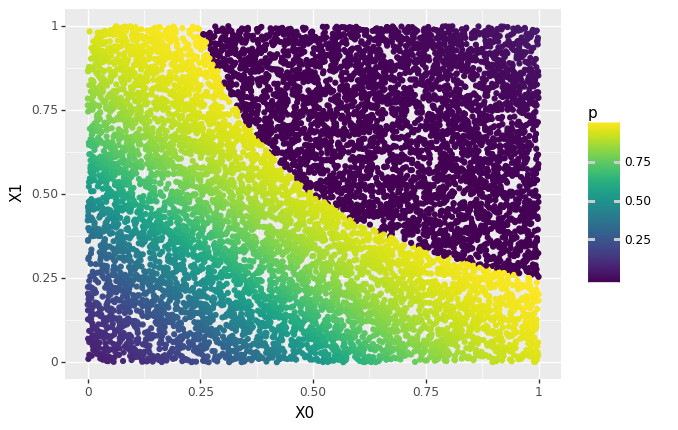

<ggplot: (8730127431921)>

In [6]:
p9.ggplot(XOR_data,p9.aes(x='X0',y='X1',color='p')) + p9.geom_point()

Create a neural net with dense hidden layers (including intercepts for each hidden unit) and logistic loss function.  Train it on the above dataset with 2 dimensional input using Adam and 32 minibatch size.  You may want to increase the number of iterations until you see convergence.  You can assess visually by plotting the predictions and comparing to the true probability.

1. (10 pts) Try ReLu activation as well as sigmoid activation for 1 hidden layer and 3 units.
2. (10 pts) Try ReLu activation with 2 hidden layers and 3 units each.
3. (10 pts) Try (2) but with any combination of ReLu and Sigmoid activation.

__Exercise 4__ (60 pts)


Load the housing.csv dataset, your task is to predict the Sale price.  Deal with the missing data by simple imputation and by creating missingness indicator variables.  Train random forests, gradient tree boosting (XGBoost), K-nearest neighbors, and kernel SVMs.  Also, train a multilayer perceptron as in exercise 3, with multiple choices of depth, width, and activation functions.  Compare them using appropriate cross-validation.